# SEP Spectra Tool
This tool determines a peak or integral (fluence) energy spectrum based on a custom time interval. 

An optional pre-event background subtraction is possible.

In [ ]:
import os
import datetime as dt
import pandas as pd
from spectra import Event
import spectra.widgets as w
from seppy.util import jupyterhub_data_path

# Select spacecraft, instrument and time intervals

In [ ]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', index=2, options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', …

Dropdown(description='Sensor:', options=('EPT', 'HET'), value='EPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Data loading and background subtraction 

In [ ]:
# Define period for data loading; the format is (year, month, day, hour, minute, second), with hour, minute, and second optional
startdate = dt.datetime(2023, 3, 13)
enddate = dt.datetime(2023, 3, 16)

# choose if background subtraction is used and define background interval, if True
subtract_background = True
background_start = dt.datetime(2023, 3, 13, 0)
background_end = dt.datetime(2023, 3, 13, 4, 0)   


# Choose the spectral type (peak or integral (fluence) spectrum) and provide time interval

In [ ]:
spectral_type = 'integral'  # 'integral' or 'peak'

# interval for spectral integration or peak search:
spec_start = dt.datetime(2023, 3, 13, 6)
spec_end = dt.datetime(2023, 3, 15, 5)

# Choose the resampling (this is used for the time series plots and will affect the spectrum if spectral_type = 'peak'
resample = '10min'  # '60s'

In [ ]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

JupyterHub detected. Adjusting data path to /home/jovyan/data


### Load the data


In [ ]:
E = Event()
E.load_data(w.spacecraft_drop.value, w.sensor_drop.value, w.species_drop.value, startdate, enddate, w.view_drop.value, resample, data_path)

### Plot intensity-time series to tune the chosen time intervals

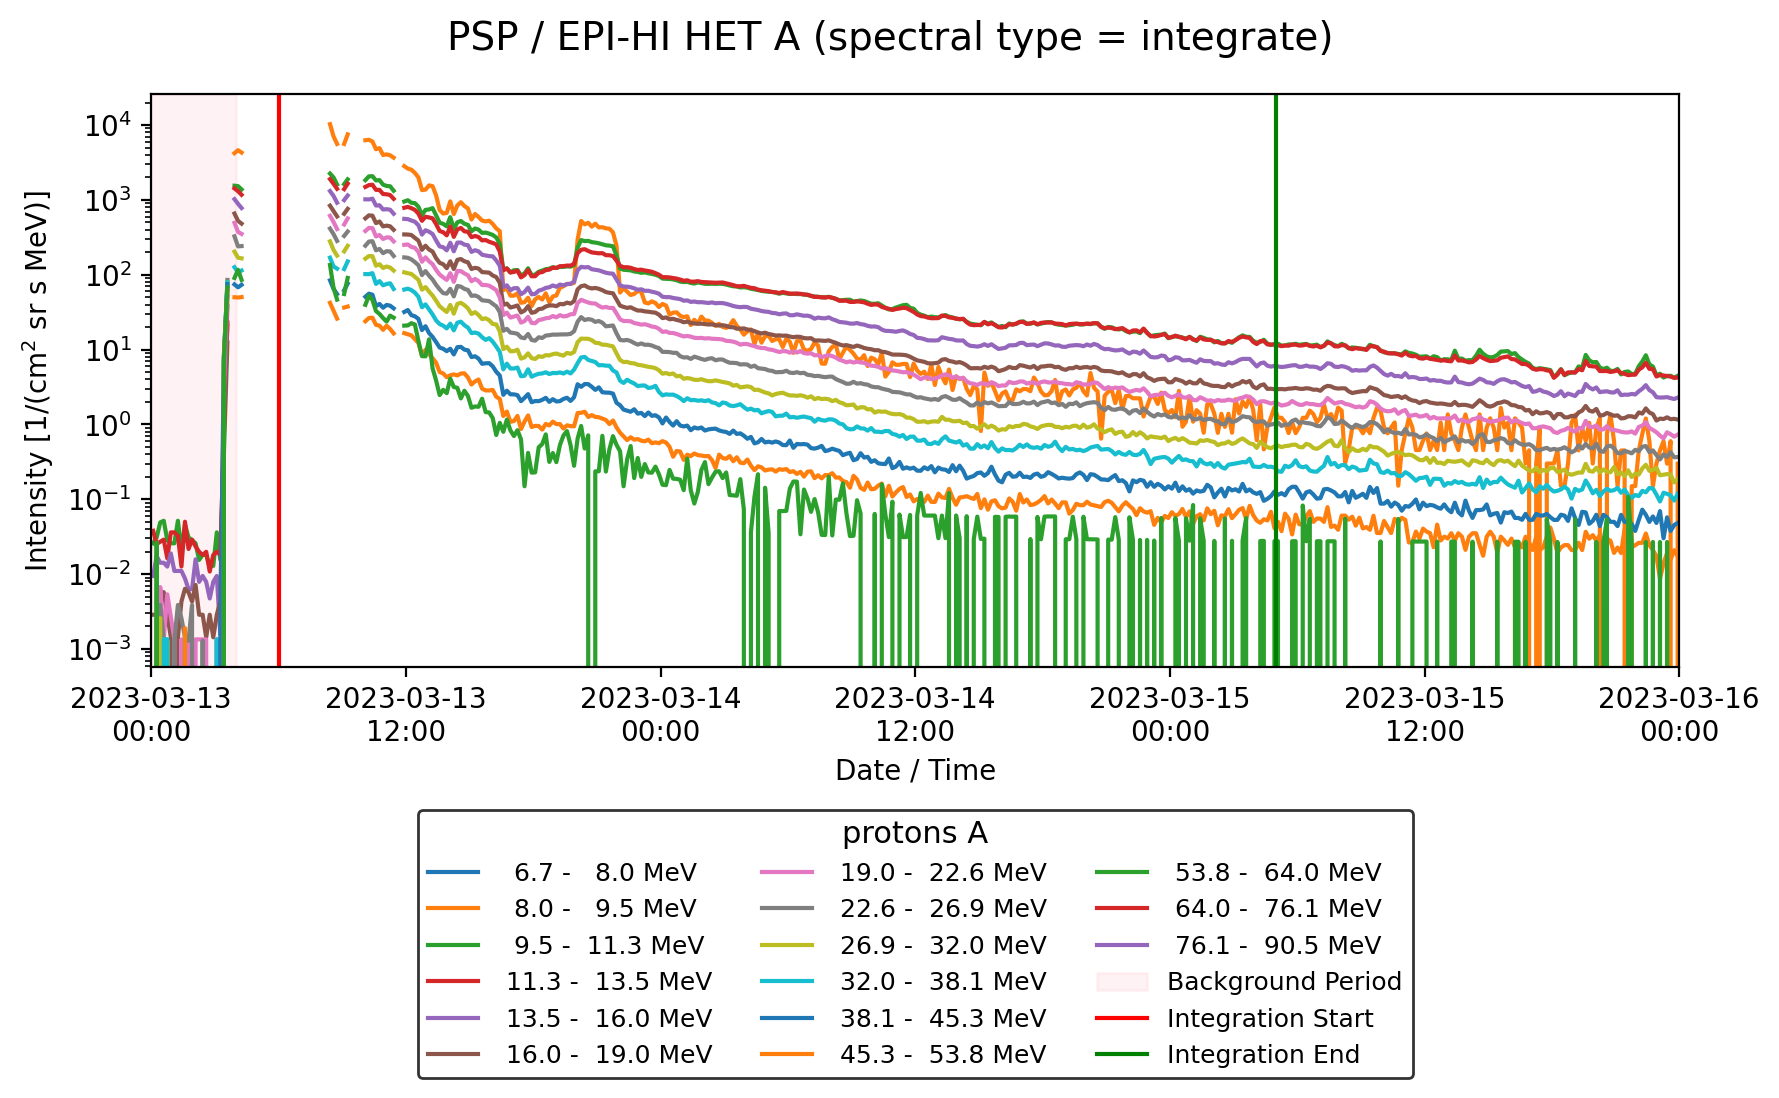

In [ ]:
fig, ax = E.plot_flux(spec_start, spec_end, subtract_background=subtract_background, 
                      background_start=background_start, background_end=background_end,
                      savefig=False, spec_type=spectral_type)

### Determine and plot spectrum

subtracting background


/home/jovyan/soler/sep_tools/spectra/__init__.py:373: RuntimeWarning: Mean of empty slice
  bg_spec = np.nanmean(df_fluxes.iloc[ind_bg], axis=0)


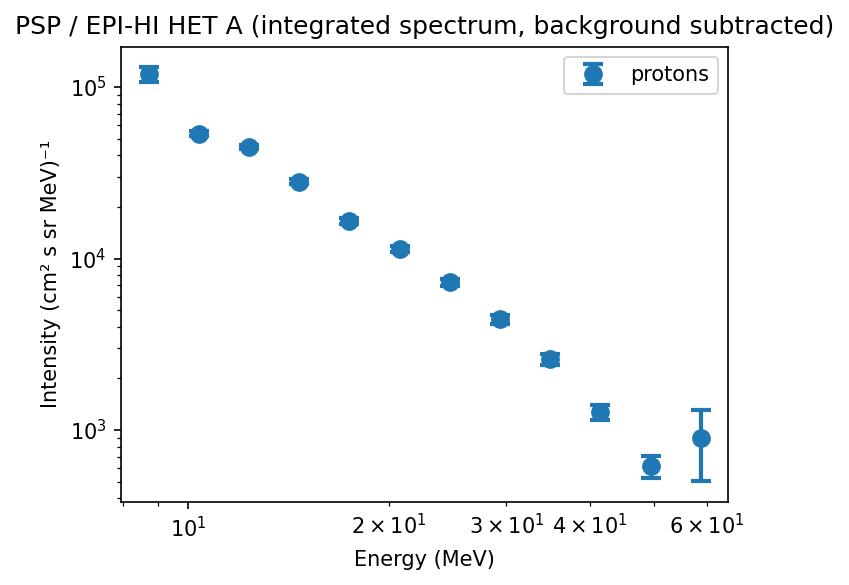

In [ ]:
E.get_spec(spec_start, spec_end, spec_type=spectral_type, subtract_background=subtract_background,
                      background_start=background_start, background_end=background_end)

fig, ax = E.plot_spectrum(savefig=False)

# Export spectrum data file

In [ ]:
filename = f'Spectrum_{spectral_type}_{E.spacecraft.upper()}_{E.instrument.upper()}_{E.viewing}_{E.species}.csv'

spec_df = pd.DataFrame(dict(Energy = E.spec_E, Intensity = E.final_spec))
spec_df.to_csv(filename, index=False)

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).